<a href="https://colab.research.google.com/github/sulthannauval/MachineLearning-Course/blob/main/Tugas-Minggu-2/2_Polynomial_Regression_Sulthan_1103213065.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

Lecture 2 - Polynomial Regression - Salary_Data_Simple_SVR.csv

---

*   Nama : Sulthan Nauval Abdillah
*   NIM : 1103213065
*   ChatGPT : [link text](https://chat.openai.com/share/fe1b5a60-b66e-4518-86d1-f48e087533a5)

## Prompt ChatGPT : Ingin membuat model polynomial regression dengan dataset Salary_Data_Simple_SVR.csv bagaimana tahapannya?



In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

### Memuat Dataset

In [29]:
dataset = pd.read_csv("/content/drive/MyDrive/Datasets/Salary_Data_Simple_SVR.csv")

### Pemrosesan Data


In [30]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# Pisahkan data menjadi data latih dan data uji (opsional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Membangun Model

In [31]:
poly_features = PolynomialFeatures(degree=2)  # Sesuaikan derajat polinomial sesuai kebutuhan
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test_poly)

### Evaluasi Model

In [32]:
# Evaluasi model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Coefficient of Determination (R^2):", r2)

Root Mean Squared Error (RMSE): 7247.614529538321
Mean Absolute Error (MAE): 6381.371429702192
Mean Absolute Percentage Error (MAPE): 7.770335974412225
Coefficient of Determination (R^2): 0.897164578089087


## Prompt ChatGPT : Bagaimana cara memvisualisasikan data train, data test, dengan garis regresi dari model polynomial tersebut? bagaimana jika ingin bentuk garisnya polinomial?

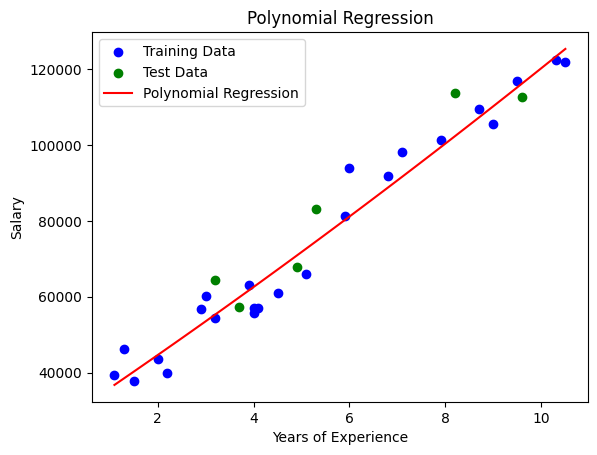

In [34]:
# Menyiapkan titik-titik pada sumbu x untuk plot garis polinomial
X_range = np.linspace(np.min(X), np.max(X), 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)

# Prediksi nilai untuk setiap titik pada sumbu x
y_range_pred = model.predict(X_range_poly)

# Visualisasi data latih, data uji, dan garis regresi polinomial
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_range, y_range_pred, color='red', label='Polynomial Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

## Prompt ChatGPT : Bagaimana cara mengetahui berapa nilai actual dari data test, dengan nilai prediksi dari model? juga tampilkan kolom YearsExperience

In [35]:
# Prediksi nilai untuk data uji
y_pred = model.predict(X_test_poly)

# Tambahkan kolom YearsExperience ke data uji
X_test_with_years = np.concatenate((X_test, y_test.reshape(-1, 1)), axis=1)

# Tambahkan kolom prediksi ke data uji
X_test_with_pred = np.concatenate((X_test_with_years, y_pred.reshape(-1, 1)), axis=1)

# Konversi array numpy ke dataframe pandas
df_test_with_pred = pd.DataFrame(X_test_with_pred, columns=['YearsExperience', 'ActualSalary', 'PredictedSalary'])

# Tampilkan data uji beserta nilai prediksi dan aktual
print(df_test_with_pred)

   YearsExperience  ActualSalary  PredictedSalary
0              9.6      112635.0    116296.154089
1              4.9       67938.0     70861.405662
2              8.2      113812.0    102389.930923
3              5.3       83088.0     74589.524904
4              3.2       64445.0     55304.715307
5              3.7       57189.0     59831.839961


## Bagaimana cara menginputkan data baru dan meminta supaya model memberikan prediksi dari data yang kita masukkan?

In [36]:
def predict_new_data(model, poly_features, new_data):
    # Preproses data baru (jika diperlukan)
    new_data_poly = poly_features.transform(new_data)
    # Lakukan prediksi
    prediction = model.predict(new_data_poly)
    return prediction

# Contoh data baru yang ingin diprediksi
new_data = np.array([[10]])  # Misalnya, data baru memiliki 1 fitur (YearsExperience) dan nilai 10

# Lakukan prediksi
predicted_salary = predict_new_data(model, poly_features, new_data)

print("Predicted salary for new data:", predicted_salary)

Predicted salary for new data: [120327.40771797]
